# Men's Shoe Prices 
The goal of this kernel is to complete the **[task](https://www.kaggle.com/sureshmecad/mens-shoe-prices/tasks?taskId=4437)** associated with the dataset. The specific goals include:
> - What is the average price of each distinct brand listed?
> - Which brands have the highest prices?
> - Which ones have the widest distribution of prices?
> - Is there a typical price distribution (e.g., normal) across brands or within specific brands?
> - Correlate specific product features with changes in price.

One thing to note before we begin... This dataset include a lot of information on products that aren't actually shoes! Items such as watches and other accessories seem to have been mistakenly included during the original data gathering process (likely due to mislabeled categories). Fully correcting for this would require a decent amount of manual work / advanced regex and NLP and is outside the scope of this kernel. As a result, please interpret the final outputs with a grain of salt and not fully reflective of reality beyond this dataset. That being said, the general code and methodologies used within should still be a useful learning experience!

Let's dive in!

# Imports & Settings

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_theme(context='talk')

# Data Cleaning / Preprocessing

## Summary Info
To start, let's get a general feel for the data we're working with.

In [3]:
df = pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19387 entries, 0 to 19386
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   19387 non-null  object 
 1   asins                2571 non-null   object 
 2   brand                19129 non-null  object 
 3   categories           19387 non-null  object 
 4   colors               11048 non-null  object 
 5   count                0 non-null      float64
 6   dateadded            19387 non-null  object 
 7   dateupdated          19387 non-null  object 
 8   descriptions         9904 non-null   object 
 9   dimension            2991 non-null   object 
 10  ean                  9999 non-null   float64
 11  features             13997 non-null  object 
 12  flavors              0 non-null      float64
 13  imageurls            18342 non-null  object 
 14  isbn                 0 non-null      float64
 15  keys                 19387 non-null 

E:\Programs\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (39,45) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.head()

,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,...,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,vin,websiteids,weight
0,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,699302044036,NaN,NaN,NaN
1,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,699302044036,NaN,NaN,NaN
2,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN
3,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN
4,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN


In [5]:
df.describe()

,count,ean,flavors,isbn
count,0.0,9.999000e+03,0.0,0.0
mean,NaN,8.369699e+11,NaN,NaN
std,NaN,1.021830e+12,NaN,NaN
min,NaN,1.014667e+07,NaN,NaN
25%,NaN,6.759119e+11,NaN,NaN
50%,NaN,8.367772e+11,NaN,NaN
75%,NaN,8.871196e+11,NaN,NaN
max,NaN,9.416997e+12,NaN,NaN


In [6]:
round(df.isna().sum() / df.shape[0], 3)

id                     0.000
asins                  0.867
brand                  0.013
categories             0.000
colors                 0.430
count                  1.000
dateadded              0.000
dateupdated            0.000
descriptions           0.489
dimension              0.846
ean                    0.484
features               0.278
flavors                1.000
imageurls              0.054
isbn                   1.000
keys                   0.000
manufacturer           0.654
manufacturernumber     0.219
merchants              0.276
name                   0.000
prices_amountmin       0.001
prices_amountmax       0.000
prices_availability    0.990
prices_color           0.961
prices_condition       0.349
prices_count           0.996
prices_currency        0.004
prices_dateadded       0.001
prices_dateseen        0.001
prices_flavor          0.996
prices_issale          0.003
prices_merchant        0.286
prices_offer           0.686
prices_returnpolicy    0.947
prices_shippin

## Dropping Columns
The data is fairly messy as it currently stands. There are lots of missing values (some columns are even entirely missing) and there are various data types that need corrected. Given the limited number of questions being answered for this task, a good chunk of the available data is irrelevant. Right off the bat, let's eliminate any columns that are missing 80% or more of their values. This will help reduce the size of the data we're working with and make further cleaning processes a bit easier.

In [7]:
cols_to_drop = [col for col in df.columns if df[col].isna().sum() >= 0.8*df.shape[0]]
cols_to_drop

['asins',
 'count',
 'dimension',
 'flavors',
 'isbn',
 'prices_availability',
 'prices_color',
 'prices_count',
 'prices_flavor',
 'prices_returnpolicy',
 'prices_size',
 'prices_source',
 'prices_warranty',
 'quantities',
 'reviews',
 'vin',
 'websiteids',
 'weight']

In [8]:
df.drop(columns=cols_to_drop, inplace=True)
df.columns

Index(['id', 'brand', 'categories', 'colors', 'dateadded', 'dateupdated',
       'descriptions', 'ean', 'features', 'imageurls', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_condition', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_shipping',
       'prices_sourceurls', 'sizes', 'skus', 'sourceurls', 'upc'],
      dtype='object')

Starting to get somewhere, but there's still more columns to drop:

In [9]:
df.drop(columns=['id', 'dateadded', 'dateupdated', 'descriptions', 'ean', 
                 'features', 'imageurls', 'keys', 'manufacturer',
                 'manufacturernumber', 'merchants', 'prices_condition',
                 'prices_dateadded', 'prices_dateseen', 'prices_issale',
                 'prices_merchant', 'prices_offer', 'prices_shipping',
                 'prices_sourceurls', 'sizes', 'skus', 'sourceurls', 'upc'],
       inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19387 entries, 0 to 19386
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   brand             19129 non-null  object
 1   categories        19387 non-null  object
 2   colors            11048 non-null  object
 3   name              19387 non-null  object
 4   prices_amountmin  19377 non-null  object
 5   prices_amountmax  19387 non-null  object
 6   prices_currency   19311 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


## Adjusting Data Types

Some finishing touches by adjusting the data types:

In [10]:
df.prices_amountmin = pd.to_numeric(df.prices_amountmin, errors='coerce', downcast='float')
df.prices_amountmax = pd.to_numeric(df.prices_amountmax, errors='coerce', downcast='float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19387 entries, 0 to 19386
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             19129 non-null  object 
 1   categories        19387 non-null  object 
 2   colors            11048 non-null  object 
 3   name              19387 non-null  object 
 4   prices_amountmin  19294 non-null  float32
 5   prices_amountmax  19350 non-null  float32
 6   prices_currency   19311 non-null  object 
dtypes: float32(2), object(5)
memory usage: 908.9+ KB


In [11]:
df.head()

,brand,categories,colors,name,prices_amountmin,prices_amountmax,prices_currency
0,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,"Josmo 8190 Plain Infant Walking Shoes, Navy - ...",39.889999,39.889999,USD
1,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,"Josmo 8190 Plain Infant Walking Shoes, Navy - ...",51.990002,51.990002,USD
2,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,Servus By Honeywell Shoe Studs Zsr101blmlg,40.020000,40.020000,USD
3,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,Servus By Honeywell Shoe Studs Zsr101blmlg,50.310001,50.310001,USD
4,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,Servus By Honeywell Shoe Studs Zsr101blmlg,46.259998,46.259998,USD


Much better! 

## Cleaning Final Dataframe
### Prices
The two columns for price (`prices_amountmin` and `prices_amountmax`) caught my eye since the first five rows in the dataframe have the same value for both. To investigate this further, let's check what percentage of the rows have the same value in both columns.

In [12]:
sum(df.prices_amountmin == df.prices_amountmax) / df.shape[0]

0.9614690256357353

Over 96%! As a result, I'm okay with combining the two columns into a single column called `price` by taking the average.

In [13]:
df['price'] = np.mean([df.prices_amountmin, df.prices_amountmax], axis=0)
df_cleaned = df.drop(columns=['prices_amountmin', 'prices_amountmax'])
df_cleaned.head()

,brand,categories,colors,name,prices_currency,price
0,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,"Josmo 8190 Plain Infant Walking Shoes, Navy - ...",USD,39.889999
1,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,"Josmo 8190 Plain Infant Walking Shoes, Navy - ...",USD,51.990002
2,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,Servus By Honeywell Shoe Studs Zsr101blmlg,USD,40.020000
3,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,Servus By Honeywell Shoe Studs Zsr101blmlg,USD,50.310001
4,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,Servus By Honeywell Shoe Studs Zsr101blmlg,USD,46.259998


Next, let's check the value counts for the `prices_currency` column.

In [14]:
df_cleaned.prices_currency.value_counts()

USD                                                   18524
AUD                                                     338
CAD                                                     303
EUR                                                     107
GBP                                                      22
UnbeatableSale.com, Inc. - Walmart.com                    3
New with box                                              3
new                                                       3
PalmBeach Jewelry - Walmart.com                           3
Wholesale Costume and Party Supplies - Walmart.com        2
SHOEBACCA LTD. - Walmart.com                              1
Shoes.com                                                 1
New without tags                                          1
Name: prices_currency, dtype: int64

It appears that some data was incorrectly placed in the `prices_currency` column in the original dataset. The overwhelming majority is priced in USD though. We could either work on converting the other currencies to USD for accurate comparisons, or simply drop those rows. For the sake of simplicity in this kernel, let's drop the rows.

In [15]:
df_cleaned = df_cleaned[df_cleaned.prices_currency == 'USD']
df_cleaned.prices_currency.value_counts()

USD    18524
Name: prices_currency, dtype: int64

### Missing Values

In [16]:
df_cleaned.isna().sum()

brand                17
categories            0
colors             7984
name                  0
prices_currency       0
price                 0
dtype: int64

The missing values in the `color` column are fine for now but the 17 missing values for the `brand` column need handled.

In [17]:
df_cleaned.dropna(axis=0, subset=['brand'], inplace=True)
df_cleaned.isna().sum()

brand                 0
categories            0
colors             7981
name                  0
prices_currency       0
price                 0
dtype: int64

### Standardizing Brands
Finally, let's change all of the brand names to lowercase. This is to help prevent any variations in capitalization from being classified as different brands. While a more serious method of cleaning the brand names would need to be employed in any sort of production code, this will suffice for now.

In [18]:
df_cleaned.brand = df_cleaned.brand.apply(lambda x: x.lower(), convert_dtype=False)
df_cleaned.brand.head()

0                  josmo
1                  josmo
2    servus by honeywell
3    servus by honeywell
4    servus by honeywell
Name: brand, dtype: object

# Answering the Questions
## What is the average price of each distinct brand listed?
To begin answering this questions, let's first take a look at how many unique brands are in the data.

In [19]:
df_cleaned.brand.nunique()

1735

Wow! That's way too many to effectively visualize. Let's limit the brands we look at to only those with more than 50 rows of data. This will help eliminate random, unheard of brands with only a couple entries as well as entries which aren't actually

In [20]:
brands_above_50 = df_cleaned.brand.value_counts()[df_cleaned.brand.value_counts() > 50]
brands_above_50

nike                           1778
ralph lauren                    699
puma                            610
vans                            386
new balance                     371
reebok                          277
adidas                          258
jordan                          200
superior glove works            182
fuse lenses                     174
fossa apparel                   174
skechers                        165
converse                        153
dickies                         144
unbranded                       134
unique bargains                 127
berne apparel                   126
crocs                           120
toms                            115
asics                           114
kinco                           110
national safety apparel inc     107
under armour                    105
gameday boots                   103
stacy adams                      98
scully                           96
georgia boot                     94
polo ralph lauren           

In [21]:
df_brands = df_cleaned[df_cleaned.brand.isin(brands_above_50.index)].groupby('brand').mean()
df_brands.sort_values('price', ascending=False, inplace=True)
df_brands

,price
brand,
ralph lauren,509.997437
invicta,414.075256
casio,384.682953
fizik,296.242737
gameday boots,235.530197
scully,230.631042
national safety apparel inc,209.457199
maui jim,184.454620
justin boots,172.847672


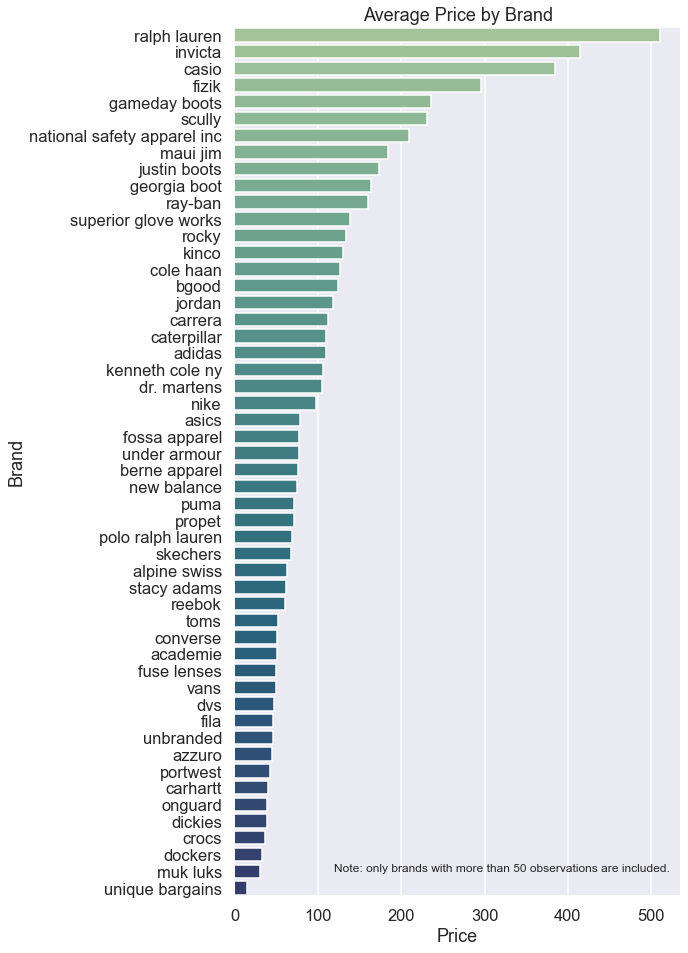

In [22]:
fig = plt.figure(figsize=(8, 16))
sns.barplot(data=df_brands, x='price', y=df_brands.index, palette='crest')
plt.title('Average Price by Brand')
plt.xlabel('Price')
plt.ylabel('Brand')
plt.annotate(text='Note: only brands with more than 50 observations are included.',
             xy=(120, 50),
             fontsize=12);

## Which brands have the highest prices?

In [23]:
df_max_prices = df_cleaned[df_cleaned.brand.isin(brands_above_50.index)].sort_values('price', ascending=False)
df_max_prices = df_max_prices.drop_duplicates('brand')
df_max_prices[['brand', 'name', 'price']]

,brand,name,price
1452,adidas,Yeezy Boost 350 Turtle Doves Kanye West 2015 P...,2799.949951
15719,ralph lauren,Crocodile Barnet Espadrille,2100.000000
17345,national safety apparel inc,National Safety Apparel Inc National Safety Ap...,2083.030029
13901,invicta,Invicta Men's 6105 Venom Reserve Chronograph G...,1995.000000
4388,superior glove works,Superior Glove Works Superior Spgrk Contender ...,1647.310059
554,casio,Casio G-shock Mt-g Tough Solar Mens Watch Mtg...,1400.000000
11249,nike,Nike Air Jordan Xii 12 Rare Wings Men's Shoes ...,1225.000000
4020,unbranded,"""Men's Black Faux Leather Business Briefcase M...",1134.989990
6977,puma,Jersey Chivas 110 A��os Conmemorativa 1906 Pie...,1100.000000
17131,jordan,"""Jordan Mens Air Jordan 11 Retro Prem ""grey Su...",749.000000


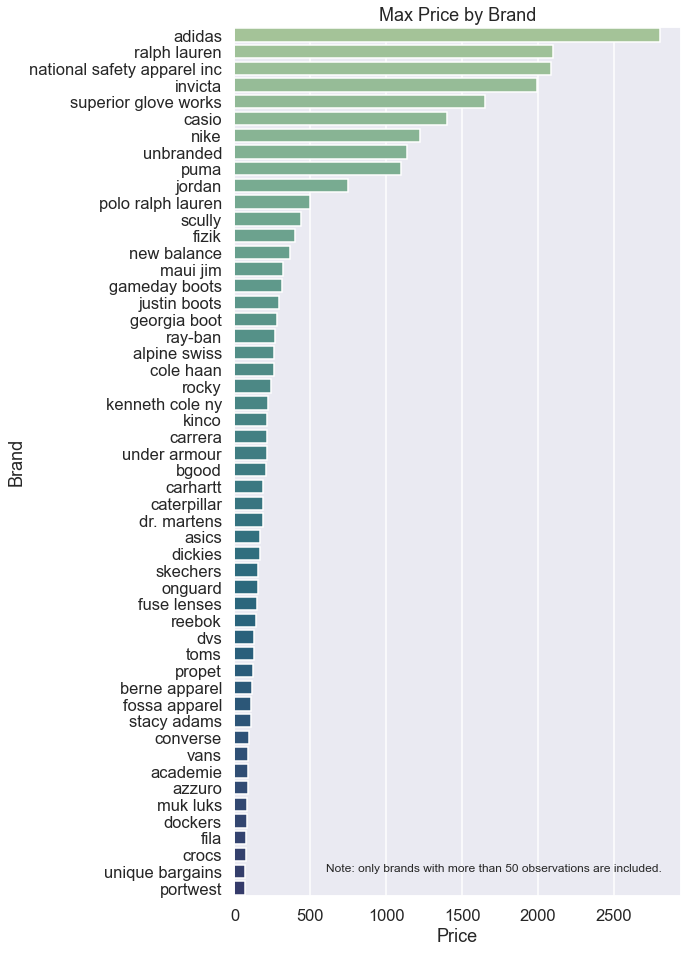

In [24]:
fig = plt.figure(figsize=(8, 16))
sns.barplot(data=df_max_prices, x='price', y='brand', palette='crest')
plt.title('Max Price by Brand')
plt.xlabel('Price')
plt.ylabel('Brand');
plt.annotate(text='Note: only brands with more than 50 observations are included.',
             xy=(600, 50),
             fontsize=12);


## Which ones have the widest distribution of prices?

In [25]:
df_medians = df_cleaned[df_cleaned.brand.isin(brands_above_50.index)]
df_medians = df_medians.groupby('brand').median()
df_medians = df_medians.sort_values('price', ascending=False)
df_medians.head()

,price
brand,
ralph lauren,425.000000
casio,383.579987
fizik,290.622498
gameday boots,259.989990
invicta,204.990005


The answer to this question is up for debate depending on the interpretation of the question. "Widest distribution" could be defined in a number of ways including:
- Standard deviation (nominal or as a percentage)
- The interquratile range (IQR)
- Difference between maximum and minimum values

Most of this information can be captured by utilizing boxplots. The boxplots could be ordered in a number of ways, but using the median tends to yield a fairly orderly result.

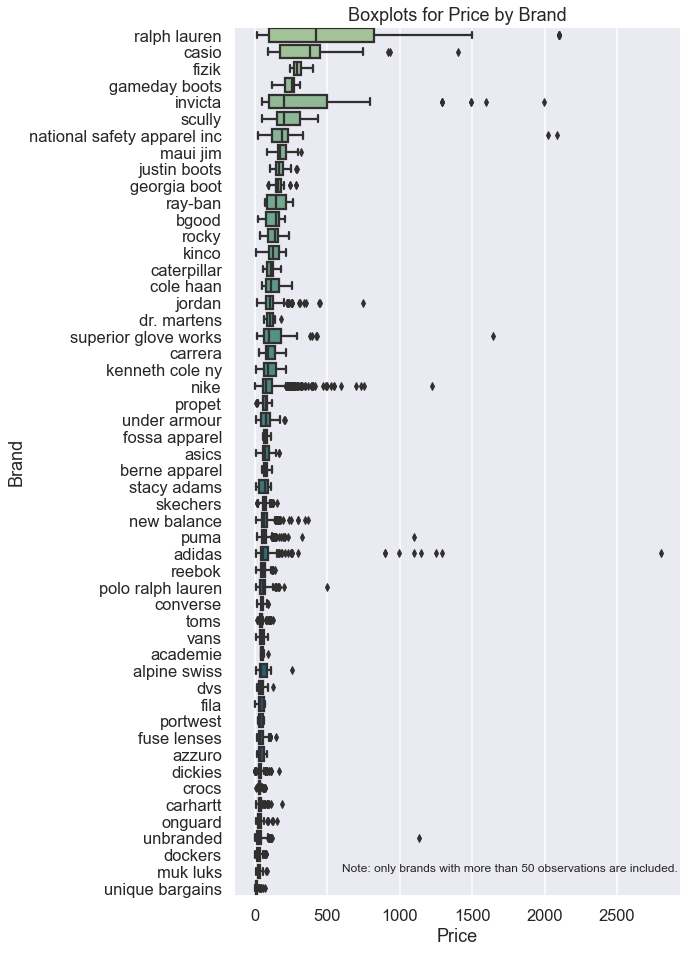

In [26]:
fig = plt.figure(figsize=(8, 16))
sns.boxplot(data=df_cleaned[df_cleaned.brand.isin(brands_above_50.index)],
            x='price',
            y='brand',
            order=df_medians.index,
            palette='crest',
            orient='h')
plt.title('Boxplots for Price by Brand')
plt.xlabel('Price')
plt.ylabel('Brand')
plt.annotate(text='Note: only brands with more than 50 observations are included.',
             xy=(600, 50),
             fontsize=12);

## Is there a typical price distribution (e.g., normal) across brands or within specific brands?

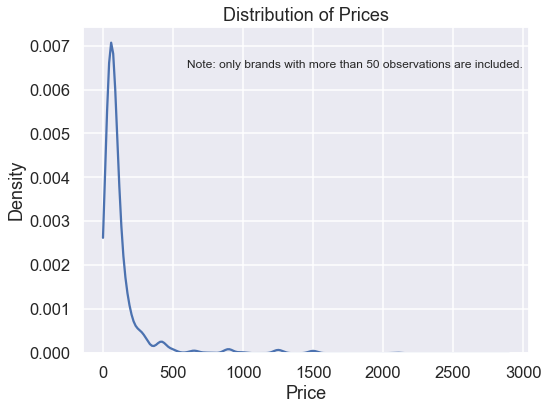

In [27]:
df_all_dist = df_cleaned[df_cleaned.brand.isin(brands_above_50.index)]
fig = plt.figure(figsize=(8, 6))
sns.kdeplot(df_all_dist['price'], clip=(0, None))
plt.title('Distribution of Prices')
plt.xlabel('Price');
plt.annotate(text='Note: only brands with more than 50 observations are included.',
             xy=(600, 0.0065),
             fontsize=12);

The distribution of all prices for brands with more than 50 observations is heavily skewed to the right. Let's takes a look at what happens when we apply a log transformation:

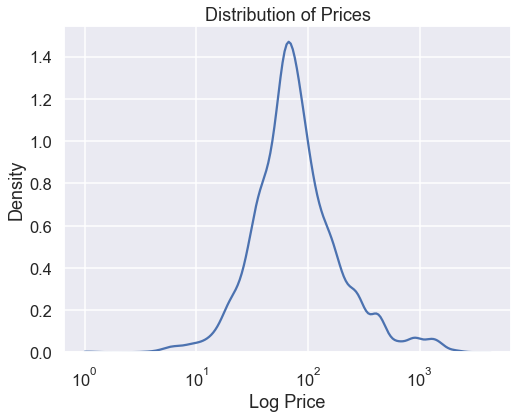

In [28]:
fig = plt.figure(figsize=(8, 6))
sns.kdeplot(df_all_dist['price'], clip=(0, None), log_scale=True)
plt.title('Distribution of Prices')
plt.xlabel('Log Price');

So it appears that the prices are log-normally distributed. We can check the distribution of an individual brand with more than 50 observations by creating a simple function.

In [29]:
def plot_brand_distribution(brand, log=False):
    '''
    Description: Takes a brand name and boolean value for log and plots a KDE plot for the distribution
    of that specific brand's prices (log prices if log == True).
    
    Inputs:
    - brand : str
         The name of the brand to visualize. Must have more than 50 observations in the original data set.
         Case insensitive as it will automatically be lowercased.
    
    - log : boolean, default = False
         Determines whether a log transformation should be applied to the prices.
    '''
    fig = plt.figure(figsize=(8, 6))
    sns.kdeplot(df_all_dist[df_all_dist.brand == brand.lower()]['price'], clip=(0, None), log_scale=log)
    plt.title(f'Distribution of {brand.title()}\'s Prices')
    plt.xlabel('Log Price' if log else 'Price')
    plt.show();

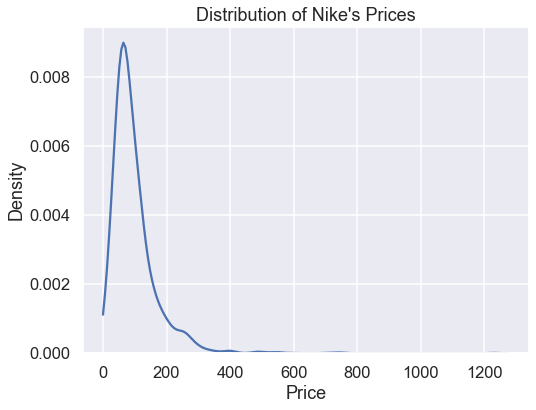

In [30]:
plot_brand_distribution('nike', False)

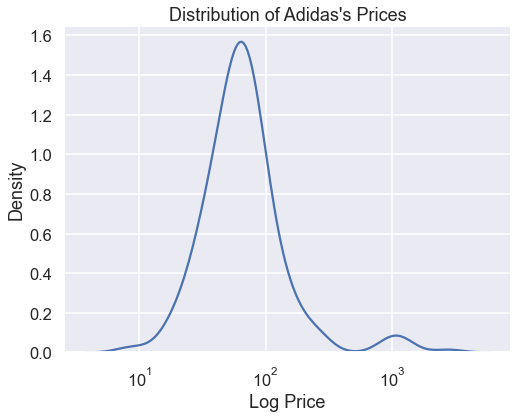

In [31]:
plot_brand_distribution('Adidas', True)

# Conclusion
That's it for this kernel! Correlating prices with specific product attributes may be added in a future update, but would require significantly more data cleaning and preprocessing.

**If you liked this notebook or have any feedback, please let me know in the comments. I'm always looking to improve!**